In [376]:
import pandas as pd
import numpy as np

In [416]:
data = pd.read_csv("CSVS/players_stats_salary.csv")
data.head()
pd.set_option('display.max_columns', 500)
print(set(data["Team"]))

{'MIN', 'PHO', 'MIL', 'GSW', 'SAS', 'BRK', 'DEN', 'DAL', 'POR', 'ORL', 'IND', 'PHI', 'DET', 'BOS', 'CHO', 'OKC', 'MEM', 'LAC', 'ATL', 'HOU', 'WAS', 'NOP', 'SAC', 'NYK', 'CHI', 'LAL', 'TOR', 'UTA', 'CLE', 'MIA'}


In [378]:
def team(team):
    t = data[(data["Team"] == team)]
    datafloat = t[['Salary','G', 'GS', 'PTS', 'MP', 'PER', 'FTr', 'OWS', 'DWS', 'WS', 'VORP', 'FG', 'FGA', '3P', '3PA','2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB','TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']]
    data_cor = datafloat.corr()
    data_cor = data_cor['Salary']
    data_cor = data_cor.drop(['Salary'])
    data_cor_sum = data_cor.sum()
    data_cor_rate = 1 / data_cor_sum * data_cor
    stats = datafloat.drop(columns=['Salary'])
    stats_sum = stats.sum().astype(float)
    stats_cor_rate = stats / stats_sum * data_cor_rate
    player_co_rate = stats_cor_rate.sum(axis=1)
    salary = 100000000
    t["Player Co Rate"] = player_co_rate
    se = salary * player_co_rate
    se = se.astype(int)
    t["Salary Expected"] = se
    t["Difference"] = t["Salary Expected"] - t["Salary"]
    t["Difference"] = t["Difference"].astype(int)
    t.to_csv('CSVS/team{}.csv'.format(team), index=False)
    return t

def team_csv():
    for x in set(data["Team"]):
        team(x)
    
team_csv()

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [417]:
data = pd.read_csv("CSVS/team{}.csv".format("GSW"))

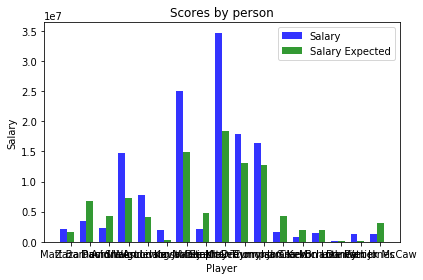

In [442]:
import matplotlib.pyplot as plt

# data to plot
n_groups = len(data["Player"])
salary = data["Salary"]
exsalary = data["Salary Expected"]
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, salary, bar_width, alpha=opacity, color='b',label='Salary')
rects2 = plt.bar(index + bar_width, exsalary, bar_width, alpha=opacity, color='g', label='Salary Expected')
 
plt.xlabel('Player')
plt.ylabel('Salary')
plt.title('Scores by person')
plt.xticks(index + bar_width, data["Player"])
plt.legend()
 
plt.tight_layout()
plt.show()